<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/TensorFlow/Learning_Neural_Network_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# TensorFlow modules
import tensorflow as tf
from tensorflow.keras.utils import plot_model

pd.DataFrame({"TensorFlow" : tf.__version__, "Numpy" : np.__version__}, index=['Version'])

,TensorFlow,Numpy
Version,2.15.0,1.25.2


# **Keras**&nbsp;&nbsp;&nbsp;`Fit -> Evaluate -> Tweak -> Repeat`
### Making a simple **Regression** model

### **Sample** data
Two **1-dimensional** tensors

In [ ]:
tf.random.set_seed(42)

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

### **Visualizing** X and y

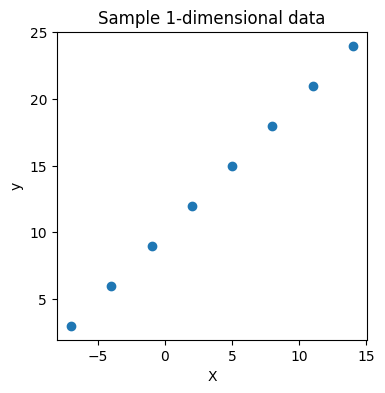

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.title("Sample 1-dimensional data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### **Creating** the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

### **Compiling** the model

In [ ]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

### **Fitting** the model

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

### Making a **prediction** - Predicting the `y` value for any `X` value

In [ ]:
y_pred = model.predict([100])
y_pred

1/1 [==============================] - 0s 392ms/step


array([[111.20012]], dtype=float32)

### **Evaluating** the model

In [ ]:
model.evaluate([5.0, 8.0], [15.0, 18.0])

1/1 [==============================] - 0s 369ms/step - loss: 0.0307 - mae: 0.0307


[0.030692577362060547, 0.030692577362060547]

### **Splitting** the dataset into **3** sets
#### 1. `Training` set
#### 2. `Validation` set
#### 3. `Testing` set

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10

X_train = X[:25]
X_test = X[25:]

y_train = y[:25]
y_test = y[25:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4], dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
        68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6],
       dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,
         62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
       dtype=int32)>)

### **Visualising** the dataset

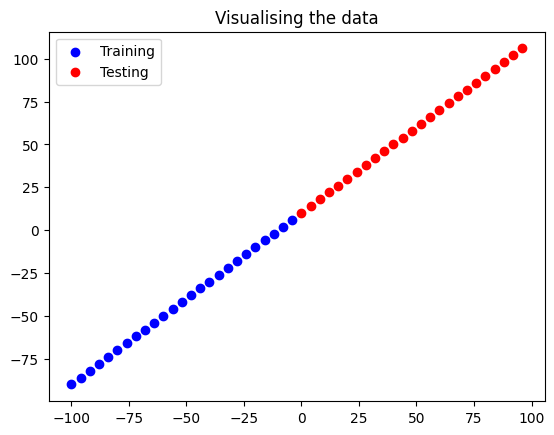

In [ ]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='r', label='Testing data')

plt.legend(['Training', 'Testing'])
plt.title('Visualising the data')

plt.show()

### **Modelling**
* Number of **trainable params** per neuron in the **Hidden Layer** = `2`

In [ ]:
tf.random.set_seed(69)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="sample_model")

# Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

# Fitting the model
model.fit(X_train, y_train, epochs=300, verbose=0)

# Obtaining model summary
model.build()
model.summary()

Model: "sample_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualising the **model's layers**

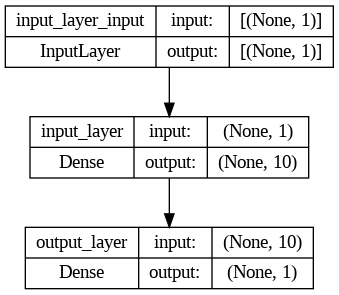

In [ ]:
plot_model(model, show_shapes=True)

### Visualising the **predictions**

In [ ]:
y_pred = model.predict(X_test)
y_pred, y_test.numpy()

1/1 [==============================] - 0s 48ms/step


(array([[  9.992961],
        [ 13.841923],
        [ 17.690886],
        [ 21.539846],
        [ 25.38881 ],
        [ 29.237774],
        [ 33.086735],
        [ 36.935696],
        [ 40.78466 ],
        [ 44.633617],
        [ 48.482586],
        [ 52.331547],
        [ 56.180508],
        [ 60.02947 ],
        [ 63.87843 ],
        [ 67.727394],
        [ 71.576355],
        [ 75.42532 ],
        [ 79.274284],
        [ 83.123245],
        [ 86.972206],
        [ 90.821175],
        [ 94.670135],
        [ 98.5191  ],
        [102.36806 ]], dtype=float32),
 array([ 10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,
         62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
       dtype=int32))

### **Plotting** function for visualizing the data

In [ ]:
def plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred, x_axis_label="X", y_axis_label="y"):
  """Plots training data, test data and compares predictions to ground truth labels."""
  fig = plt.figure(figsize=(8, 6))

  # Training datapts. in BLUE
  plt.scatter(train_data, train_labels, c='b', label='Training data')

  # Training datapts. in GREEN
  plt.scatter(test_data, test_labels, c='g', label='Testing data')

  # Predicted datapts. in RED
  plt.scatter(test_data, predictions, c='r', label='Prediction')

  plt.title("Model Performance", fontweight='bold', fontsize=15)

  plt.xlabel(f"$\mathbf{{{x_axis_label}}}$", fontweight='bold', labelpad=10)
  plt.ylabel(f"$\mathbf{{{y_axis_label}}}$", fontweight='bold', labelpad=0)

  plt.legend()
  plt.show()

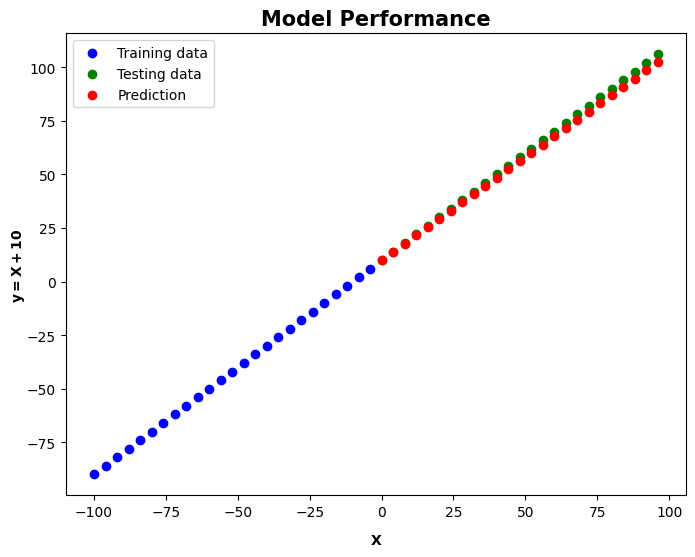

In [ ]:
plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred, y_axis_label='y=X+10')

### Evaluating the model's **prediction** performance using **Regression Evaluation** metrics

#### `Mean Absolute Error`

In [ ]:
model.evaluate(X_test, y_test)
mae = tf.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
print(f"Mean Absolute Error : {mae.numpy()}")

1/1 [==============================] - 0s 167ms/step - loss: 1.8195 - mae: 1.8195
Mean Absolute Error : 1.8194912672042847


#### `Mean Squared Error`

In [ ]:
mse = tf.losses.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
print(f"Mean Squared Error : {mse.numpy()}")

Mean Squared Error : 4.496790885925293


### **Utility** Functions for calculating **error**

In [ ]:
@tf.function
def mae(true, pred):
  res = tf.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
  return res

@tf.function
def mse(true, pred):
  res = tf.losses.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
  return res

In [ ]:
mae(y_test, y_pred).numpy()

1.8194913